In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
from matplotlib.patches import Circle
import scipy.linalg as la

(CVXPY) Apr 03 07:13:41 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 03 07:13:41 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
# Generate a random non-trivial quadratic program.
n = 10 #number of points 
p_x = np.random.uniform(0, 10, size=n) #random x's
p_y = np.random.uniform(0, 10, size=n) #random y's
P = [] # All the corrdinates
for _ in range(n):
    P.append((p_x,p_y))
    
C = np.column_stack((p_x, p_y)).T
# for i in range(C.shape[0]):
#     for j in range(C.shape[1]):
#         if i == j:
#             row_sum = sum(C[i]) - C[i][i]
#             C[i][j] = 1 + row_sum
D = (C.T @ C)
# eps = 1e-14
# D1 = D + eps*np.eye(n)

In [3]:
# la.eig(D1)

In [4]:
C.shape

(2, 10)

In [5]:
C.round(2)

array([[8.58, 7.32, 9.45, 7.05, 3.14, 0.54, 5.69, 4.5 , 2.03, 9.31],
       [4.11, 1.55, 7.89, 3.33, 2.57, 0.52, 5.9 , 9.6 , 0.08, 8.82]])

In [6]:
s = np.sum(C*C,axis=0)

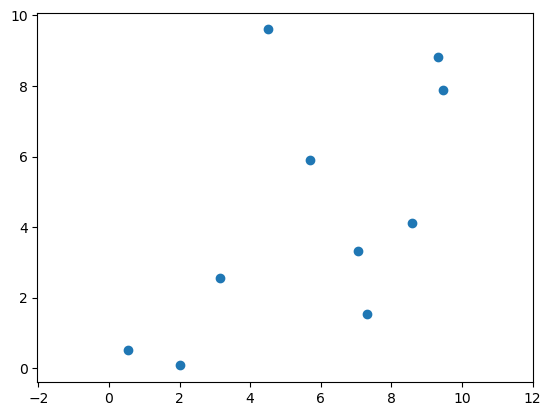

In [7]:
#plot points to see what they look like
fig, ax = plt.subplots()
ax.scatter(p_x,p_y)
plt.axis('equal')
plt.show()

In [8]:
# Define and solve the CVXPY problem.
x = cvx.Variable(n)
obj = cvx.Minimize(cvx.quad_form(x,D,quadratic=True) - s@x)
# obj = cvx.Minimize((x.T @ D @ x) - cvx.sum(C.T @ C @ x))
# obj = cvx.Minimize((x.T @ D @ x))
# obj = cvx.Minimize((x.T @ D @ x) - cvx.sum(cvx.multiply(S,x)))
# obj = cvx.Minimize(cvx.quad_form(x, D) - cvx.sum(cvx.multiply(S,x)))
# obj = cvx.Minimize(cvx.quad_form(x, D) - cvx.sum(S @ x))
constraints = [cvx.sum(x) == 1, 
               x >= 0]
prob = cvx.Problem(obj, constraints)
results = prob.solve()

In [9]:
results

-36.44776112725514

In [10]:
x_star = x.value

In [11]:
x_star.shape

(10,)

In [12]:
p_star_1 = np.sum(C[0,:] @ x_star)
p_star_2 = np.sum(C[1,:] @ x_star)

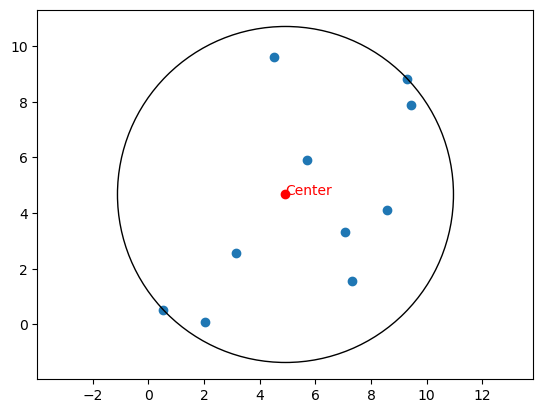

In [13]:
center = (p_star_1, p_star_2)
radius = np.sqrt(abs(results))
circle = Circle(center, radius, fill = False)
fig, ax = plt.subplots()
ax.scatter(p_x,p_y)
ax.add_patch(circle)
ax.plot(p_star_1, p_star_2, 'ro')
ax.text(p_star_1, p_star_2, 'Center', color='red')
plt.axis('equal')
plt.show()